In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [4]:
conv_base.trainable = False
print('This is the number of trainable weights ''after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [6]:
import os
import numpy as np
base_dir = r'C:\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [7]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

In [12]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 1720s 17s/step - loss: 0.5900 - acc: 0.6980 - val_loss: 0.4454 - val_acc: 0.8260
Epoch 2/30
100/100 [==============================] - 1948s 19s/step - loss: 0.4774 - acc: 0.7955 - val_loss: 0.3795 - val_acc: 0.8330
Epoch 3/30
100/100 [==============================] - 2090s 21s/step - loss: 0.4227 - acc: 0.8080 - val_loss: 0.3227 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 2167s 22s/step - loss: 0.4024 - acc: 0.8250 - val_loss: 0.3014 - val_acc: 0.8770
Epoch 5/30
100/100 [==============================] - 1972s 20s/step - loss: 0.3923 - acc: 0.8295 - val_loss: 0.3034 - val_acc: 0.8790
Epoch 6/30
100/100 [==============================] - 2060s 21s/step - loss: 0.3721 - acc: 0.8375 - val_loss: 0.2789 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 2140s 21s/step - loss: 0.3562 - acc: 0.8495 - val_loss: 0.2695 - val_acc: 0.8860
Epoch 8/30
100/100 [==============================] - 2

In [13]:
model.save('cats_and_dogs_small_4.h5')

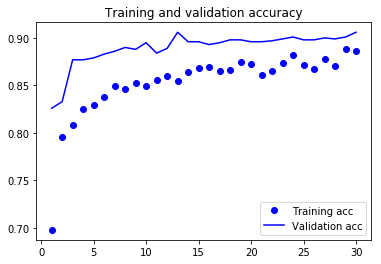

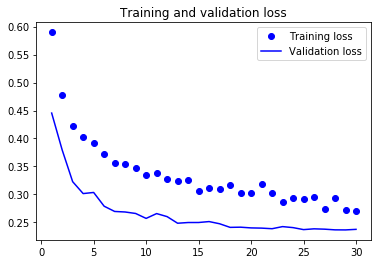

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()